# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [7]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import seaborn.objects as so



resource_url = "https://ycharts.com/companies/TSLA/revenues"


response = requests.get(resource_url,headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"})

if response:
    # Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
    soup = BeautifulSoup(response.text, 'html')
    soup


In [8]:
tables = soup.find_all("table")
tables



[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2023</td>
 <td class="text-right">
                             
                  

In [9]:
for index, table in enumerate(tables):
    table_index = index
    break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("B", "").replace(".", "").strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue.head()

,Date,Revenue
0,"March 31, 2024",2130
1,"December 31, 2023",2517
2,"September 30, 2023",2335
3,"June 30, 2023",2493
4,"March 31, 2023",2333


In [10]:
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,"March 31, 2024",2130
1,"December 31, 2023",2517
2,"September 30, 2023",2335
3,"June 30, 2023",2493
4,"March 31, 2023",2333


In [11]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [12]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

OperationalError: table revenue already exists

In [13]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[('March 31, 2024', '2130'),
 ('December 31, 2023', '2517'),
 ('September 30, 2023', '2335'),
 ('June 30, 2023', '2493'),
 ('March 31, 2023', '2333')]

In [14]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [15]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('March 31, 2024', '2130')
('December 31, 2023', '2517')
('September 30, 2023', '2335')
('June 30, 2023', '2493')
('March 31, 2023', '2333')
('December 31, 2022', '2432')
('September 30, 2022', '2145')
('June 30, 2022', '1693')
('March 31, 2022', '1876')
('December 31, 2021', '1772')
('September 30, 2021', '1376')
('June 30, 2021', '1196')
('March 31, 2021', '1039')
('December 31, 2020', '1074')
('September 30, 2020', '8771')
('June 30, 2020', '6036')
('March 31, 2020', '5985')
('December 31, 2019', '7384')
('September 30, 2019', '6303')
('June 30, 2019', '635')
('March 31, 2019', '4541')
('December 31, 2018', '7226')
('September 30, 2018', '6824')
('June 30, 2018', '4002')
('March 31, 2018', '3409')
('March 31, 2024', '2130')
('December 31, 2023', '2517')
('September 30, 2023', '2335')
('June 30, 2023', '2493')
('March 31, 2023', '2333')
('December 31, 2022', '2432')
('September 30, 2022', '2145')
('June 30, 2022', '1693')
('March 31, 2022', '1876')
('December 31, 2021', '1772')
('Sep

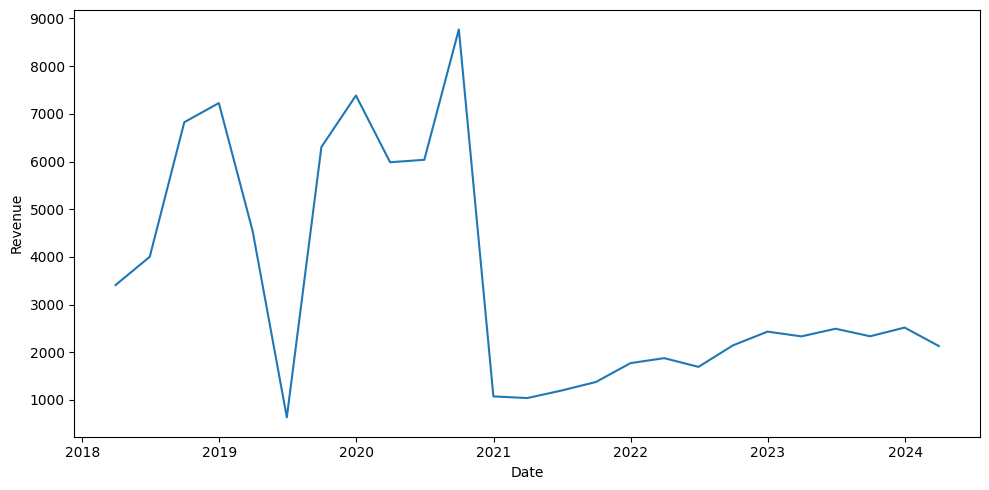

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")


plt.tight_layout()
plt.savefig('grafico1') 
plt.show()

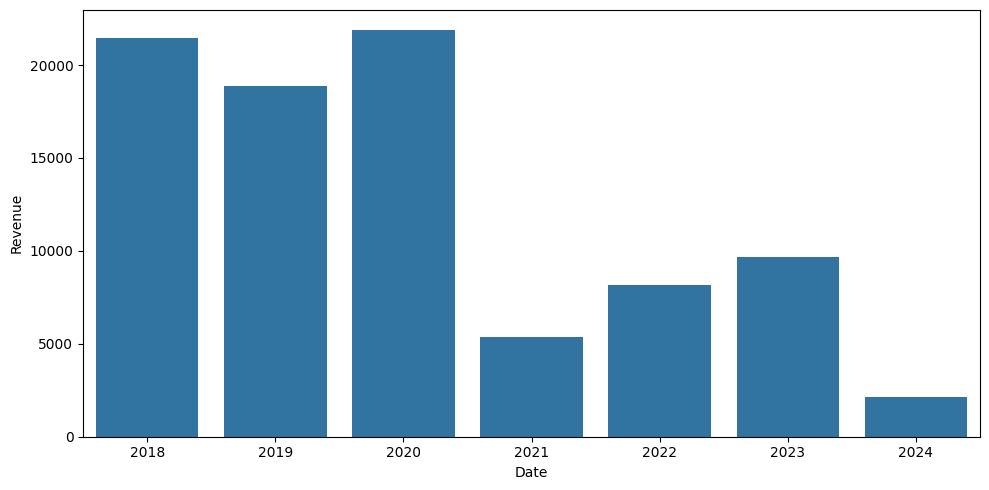

In [23]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
por_año = tesla_revenue.groupby(tesla_revenue["Date"].dt.year).sum().reset_index()

sns.barplot(data = por_año[por_año["Date"] <= 2024], x = "Date", y = "Revenue")

plt.tight_layout()
plt.savefig('grafico2') 
plt.show()

[]

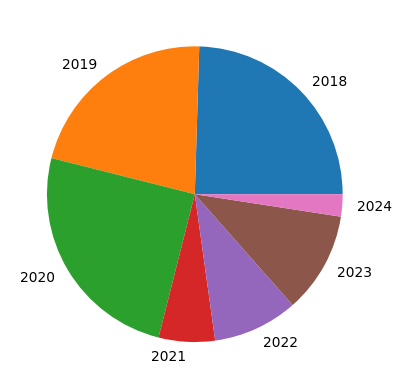

In [21]:

por_año = tesla_revenue.groupby(tesla_revenue["Date"].dt.year).sum().reset_index()

labels = por_año['Date']

fig, ax = plt.subplots()
ax.pie(por_año['Revenue'], labels=labels)
plt.savefig('grafico3') 

plt.plot()